# Biological Oceanography (BO)

<img src="Prochlorococcus_marinus.jpeg"/>


This tutorial is part of our Biological Oceanography day. It demonstrates how to do basic analysis and visualization of gridded biological data. We will use A,B,and C data which can be downloaded using CMAP API, a giant data database for Earth system observations and modeling. To download the data using API, please register at CMAP and generate your API key.

### Estimated tutorial time: 1.5 hours

## Tutorial goals

- Python Skills
    - Work with dataframes
    - Make different statistical plots
    - Data co-location
- BO knowledge
    - Learn about global ocean photosynthesis and primary productivity signatures from satellite observations 
    - Understand the vertical distributions of chlorophyll, nutrients, and light availability in the ocean
    - Explore biodiversity and how populations change in different regions of the ocean
    

## Data

- HOT: Hawaii Ocean Time series. Since 1988, the Station ALOHA near Hawaii has been sampled approximately every month as part of the HOT cruises. https://hahana.soest.hawaii.edu/hot/. This data can also be downloaded using CMAP API: https://simonscmap.com/catalog/datasets/HOT_Bottle_ALOHA. 

- The near-surface concentration of chlorophyll-a: a satellite-derived 8-day averaged product with a spatial resolution of 9km made by NASA https://earthobservatory.nasa.gov/global-maps/MY1DMM_CHLORA, which is also available from CMAP at https://simonscmap.com/catalog/datasets/MODIS%20CHL.

- The Imaging FlowCytoBot (IFCB) is an in situ automated imaging flow cytometer that generates images of particles suspended in seawater. The instrument continuously samples (few seconds) from ~5 ml aliquots from the intake, and processes all particles contained in that volume for the next 20 mins. This dataset is for the abundance of imaged cells by genus: https://simonscmap.com/catalog/datasets/Gradients2_MGL1704_IFCB_Abundance

  

## Reading 

Brierley, A. S. (2017). Plankton. Current Biology, 27(11), R478-R483. https://www.sciencedirect.com/science/article/pii/S0960982217302154

Armbrust, E. V., & Palumbi, S. R. (2015). Uncovering hidden worlds of ocean biodiversity. Science, 348(6237), 865-867. https://doi.org/10.1126/science.aaa7378

Bristow, L. A., Mohr, W., Ahmerkamp, S., & Kuypers, M. M. (2017). Nutrients that limit growth in the ocean. Current Biology, 27(11), R474-R478. https://www.sciencedirect.com/science/article/pii/S0960982217303287

Tang, W., Llort, J., Weis, J., Perron, M. M., Basart, S., Li, Z., ... & Cassar, N. (2021). Widespread phytoplankton blooms triggered by 2019–2020 Australian wildfires. Nature, 597(7876), 370-375. https://www.nature.com/articles/s41586-021-03805-8

Sala, E., Mayorga, J., Bradley, D. et al. Protecting the global ocean for biodiversity, food and climate. Nature 592, 397–402 (2021). https://doi.org/10.1038/s41586-021-03371-z

# Let's start!

In [219]:
import pandas as pd
import numpy as np
import pycmap
import plotly.express as px

import matplotlib.pyplot as plt

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

from matplotlib.colors import LogNorm
import xarray as xr

## Chlorophyll A estimates from satellite observations of ocean color

#### Get the API key by registering at simonscmap.com and then going to https://simonscmap.com/apikeymanagement

#### Create a file .cmap_key in your home directory and save your personal API key there as a single line

In [35]:
key =!tail "$HOME/$usr/.cmap_key"    # reading the last line from a file using a system command
api = pycmap.API(token=key[0])       # call api using your unique API key

In [36]:
modis=api.query(
         '''
         SELECT [time], lat, lon, chl FROM tblCHL_REP 
         WHERE 
         [time] BETWEEN '2016-06-01' AND '2016-06-16' AND 
         lat BETWEEN -90 AND 90 AND 
         lon BETWEEN -180 AND 180
         '''
         ) 
df_rows = pd.DataFrame(modis).set_index(["time",  "lat", "lon"])
ds = xr.Dataset.from_dataframe(df_rows)
chl=ds['chl'].mean('time');

del modis, ds # free some memory by deleting the no longer needed variables.

/home/gmanuch/.local/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


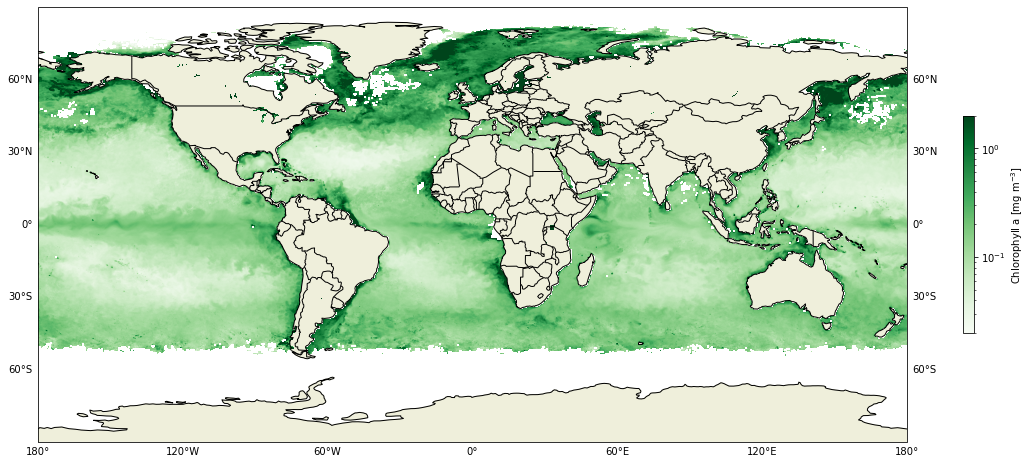

In [29]:
cmap=plt.get_cmap('Greens')

plt.figure(figsize=(20,8))
ax = plt.axes(projection=ccrs.PlateCarree())

gl=ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.xlines=None
gl.ylines=None

im=plt.imshow(chl, 
           cmap=cmap,
           norm=LogNorm(vmin=0.02, vmax=2),
           extent=[-180,180,90,-90])
plt.colorbar(im,shrink=0.5, label='Chlorophyll a [mg m$^{-3}$]')
ax.invert_yaxis()

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS);

## In-class exercise \#1: querry the chlorophyll time series averaged over a region in North Atlantic

To get the more recent data, use a different chlorophyll dataset https://simonscmap.com/catalog/datasets/MODIS%20CHL


Instructions:
 - Follow the "Query" Example \#2 provided by CMAP under Data Retrieval (API) section of the documentation: https://github.com/simonscmap/pycmap#1-data-retrieval-api 
 - Use SQL language for denoting averaged quantities, like AVG(lat) and AVG(chl) 
 - Specify the boundaries of the box: lat BETWEEN 40 AND 50 AND lon BETWEEN -40 AND -20
 - Use SQL language to group and order by time as: GROUP BY [time] and ORDER BY [time] 
 - change the time column to be a proper datetime variable for easy manipulation and cleaner plots: pd.to_datetime(time_variable)
 - make a final plot of chlorophyl concentration averaged within the North Atlantic box.
 - does the chlorophyl concentration vary smoothly or spiky? 


In [37]:
#Solution
modis_NA=api.query(
         '''
         SELECT [time], AVG(lat) AS lat, AVG(lon) AS lon, AVG(chlor_a) AS chl FROM tblModis_CHL 
         WHERE 
         [time] BETWEEN '2002-06-01' AND '2022-10-01' AND 
         lat BETWEEN 40 AND 50 AND 
         lon BETWEEN -40 AND -20
         GROUP BY [time] 
         ORDER BY [time] 
         '''
         ) 
modis_NA.time=pd.to_datetime(modis_NA.time)

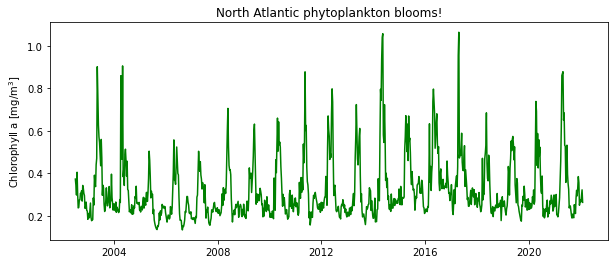

In [38]:
plt.figure(figsize=(10,4))
plt.plot(modis_NA.time, modis_NA.chl,'g')
plt.ylabel('Chlorophyll a [mg/m$^3$]')
plt.title('North Atlantic phytoplankton blooms!');

### Here is how to pivot the table to plot each year as a separate curve

In [111]:
pv = pd.pivot_table(modis_NA, 
                    index=pd.DatetimeIndex(modis_NA['time']).month, 
                    columns=pd.DatetimeIndex(modis_NA['time']).year,
                    values='chl')
pv

time,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
time,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.209718,0.245717,0.234945,0.188770,0.188650,0.219959,0.218301,0.205172,0.262402,...,0.210498,0.220652,0.294805,0.224206,0.292962,0.269252,0.259745,0.249105,0.261284,0.289735
2,NaN,0.203374,0.229266,0.255725,0.196312,0.183812,0.218750,0.230813,0.201196,0.249279,...,0.229157,0.188006,0.274067,0.271735,0.264138,0.257660,0.224373,0.258286,0.205275,0.264203
3,NaN,0.277818,0.245084,0.275763,0.230424,0.295077,0.290592,0.327482,0.334322,0.317226,...,0.262766,0.290438,0.414967,0.436379,0.360104,0.307366,0.344719,0.279234,0.343842,NaN
4,NaN,0.376562,0.711286,0.296249,0.427937,0.452212,0.320350,0.365697,0.534097,0.412722,...,0.341790,0.701792,0.581263,0.596928,0.816501,0.358562,0.397265,0.593942,0.781564,NaN
5,NaN,0.688062,0.382087,0.432668,0.381955,0.386977,0.596876,0.462840,0.557517,0.620274,...,0.590902,0.903269,0.579000,0.645510,0.496451,0.539035,0.548615,0.524213,0.686554,NaN
6,NaN,0.511081,0.462434,0.300154,0.444169,0.322987,0.449656,0.444529,0.407937,0.441205,...,0.534260,0.555373,0.449055,0.609695,0.468200,0.421548,0.468703,0.429278,0.451508,NaN
7,0.355471,0.418748,0.343981,0.197314,0.215291,0.259200,0.267742,0.290895,0.270948,0.217822,...,0.296323,0.347441,0.352605,0.424146,0.439367,0.264239,0.325776,0.285704,0.327957,NaN
8,0.265068,0.260502,0.222821,0.143634,0.153982,0.208051,0.213212,0.302997,0.224778,0.198392,...,0.200178,0.253520,0.274157,0.375542,0.319472,0.227427,0.231636,0.214536,0.229427,NaN
9,0.300399,0.279720,0.227143,0.171025,0.178603,0.170598,0.244128,0.251130,0.195592,0.285136,...,0.193583,0.252424,0.333243,0.344743,0.261079,0.237596,0.199876,0.236939,0.196791,NaN


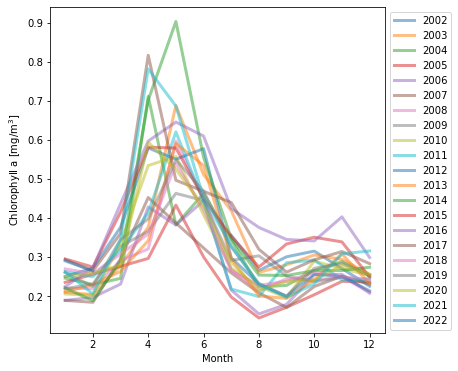

In [223]:
plt.figure(figsize=(6,6))
plt.plot(pv, alpha=0.5, linewidth=3)
plt.legend(pv.keys(), fontsize=10, bbox_to_anchor=(1, 1))
plt.xlabel('Month')
plt.ylabel('Chlorophyll a [mg/m$^3$]');

## Chlorophyll distribution with depth: light attenuation vs lack of nutrients

Recall that photosynthesis requires light and nutrients for primary production to occur. At the same time, the light is most available at the surface and it decays exponentially with depth. However, during the Chemical Oceanography tutorial we figured out that there is a lack of nutrients at the surface of the ocean. So where in the water column does photosynesis predominantly occur? 

<img src="Attenuation-of-light-underwater.png" width=350/>

### Light availability at depth

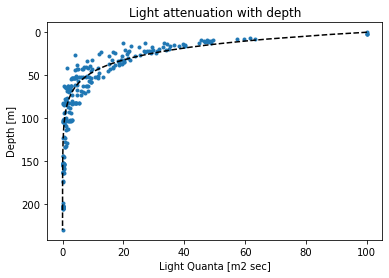

In [234]:
amt = api.get_dataset('tblAMT13_Chisholm')

plt.plot(amt['Light_Quanta_m2_sec_AMT13'],amt['depth'],'.')

d=np.sort(amt['depth'])
plt.plot(100*np.exp(-d/20),d,'k--')

plt.gca().invert_yaxis()

plt.ylabel('Depth [m]')
plt.xlabel('Light Quanta [m2 sec]')
plt.title('Light attenuation with depth');

### Deep Chlorophyll Maximum (DCM)
The deep chlorophyll maximum (DCM), also called the subsurface chlorophyll maximum, is the region below the surface of water with the maximum concentration of chlorophyll. The DCM generally exists at the same depth as the nutricline, the region of the ocean where the greatest change in the nutrient concentration occurs with depth.  https://en.wikipedia.org/wiki/Deep_chlorophyll_maximum
 
 Let's use the already familiar HOT dataset: https://simonscmap.com/catalog/datasets/HOT_PP

In [227]:
# read in hawaii ocean time series (HOT) data (1998-2019)
## https://simonscmap.com/catalog/datasets/HOT_PP
HOT = api.get_dataset('tblHOT_PP')
print(f'HOT columns only: {HOT.columns.values.tolist()}\n')

HOT columns only: ['time', 'lat', 'lon', 'depth', 'cruise_name', 'chl_hot', 'phaeopigments_hot', 'itype', 'light_12_hot', 'dark_12_hot', 'salinity_hot', 'prochlorococcus_hot', 'heterotrophic_bacteria_hot', 'synechococcus_hot', 'eukaryotes_hot']



In [228]:
#The HOT data comes at different depths, so let's make those into categories
HOT['depth_cat'] = HOT['depth']//20*20;  #using the floor division operator // to create depth bins separated by 20m.
HOT[HOT['depth_cat']==80]=np.nan;        #excluding categories where there is a small number of observations

In [236]:
depth_bins=np.sort(HOT['depth_cat'].unique())
depth_bins=depth_bins[~np.isnan(depth_bins)].astype(int)
n=len(depth_bins)
print(depth_bins)

[  0  20  40  60 100 120 140 160]


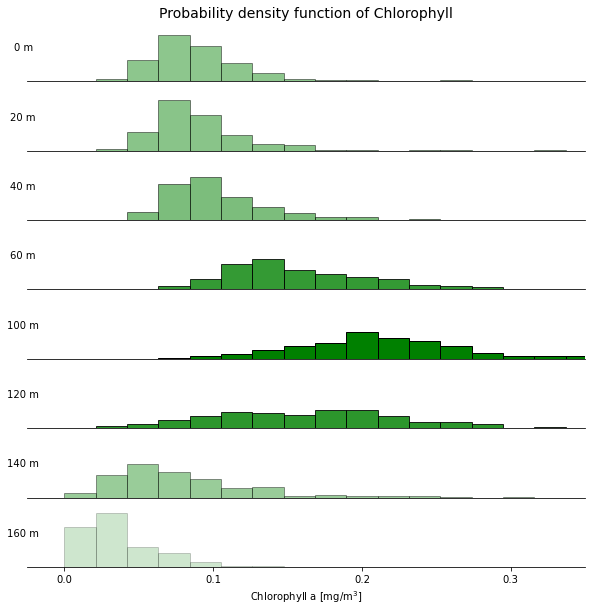

In [244]:
fig, axs=plt.subplots(n,1, figsize=(10,10))

axs=axs.flatten()

for i in range(n):
    data=HOT[HOT['depth_cat'] == depth_bins[i]]['chl_hot']
    axs[i].hist(data,bins=np.linspace(0, 0.4,20), density=True,
                histtype='bar', ec='black',color='Green',alpha=np.min((np.mean(data)/0.2,1)))
    axs[i].set_yticks([])
    axs[i].set_xlim((-0.025,0.35))
    axs[i].set_ylim((0,20))

    axs[i].set_xticks([])
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_ylabel(str(depth_bins[i]) + ' m', rotation='horizontal')     

axs[-1].set_xticks(np.linspace(0,0.3,4))
axs[-1].set_xlabel('Chlorophyll a [mg/m$^3$]') 
axs[0].set_title('Probability density function of Chlorophyll', fontsize=14);

plt.savefig('chl_depth.pdf')
plt.show()

## What micro-organisms are there in the ocean?

<img src="organisms.png"/>

Armbrust, E. V., & Palumbi, S. R. (2015). Uncovering hidden worlds of ocean biodiversity. Science, 348(6237), 865-867. https://doi.org/10.1126/science.aaa7378

### Seaflow dataset: Prochlorococcus, Synechococcus, Picoeukaryote


__Prochlorococcus__ is a genus of very small (0.6 μm) marine cyanobacteria with an unusual pigmentation (chlorophyll a2 and b2). These bacteria belong to the photosynthetic picoplankton and are probably the most abundant photosynthetic organism on Earth. Prochlorococcus microbes are among the major primary producers in the ocean, responsible for a large percentage of the photosynthetic production of oxygen https://en.wikipedia.org/wiki/Prochlorococcus


__Synechococcus__ is a unicellular cyanobacterium that is very widespread in the marine environment. Its size varies from 0.8 to 1.5 µm. The photosynthetic coccoid cells are preferentially found in well–lit surface waters where it can be very abundant (generally 1,000 to 200,000 cells per ml). Many freshwater species of Synechococcus have also been described. https://en.wikipedia.org/wiki/Synechococcus


__Picoeukaryote__: In recent years it has become apparent that a vast unexplored diversity of algal forms exist in oceans as prokaryote-sized cells (0.2–3 μm of cell mean diameter) as part of the eukaryotic picoplankton (picoeukaryotes). Marine picoeukaryotes are found in all of the major algal groups (e.g., green algae, haptophytes, stramenopiles, and dinoflagellates) and have often been uncovered using environmental (meta)genomics or environmental polymerase chain reaction (PCR) approaches in which DNA sequences are determined from environmental samples without culturing particular isolates. https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/picoeukaryote



In [248]:
# read in seaflow dataset (surface level- 5m- continuous samples across 50 cruises)
seaflow = api.get_dataset('tblSeaFlow')
seaflow.keys()
# can also get with ancilliary data
#seaflow_all = api.get_dataset_with_ancillary("tblSeaFlow")
#print(f'seaflow with ancilliary: {seaflow_all.columns.values.tolist()}')

Index(['time', 'lat', 'lon', 'depth', 'cruise', 'abundance_prochloro',
       'abundance_synecho', 'abundance_picoeuk', 'abundance_croco',
       'diam_prochloro', 'diam_synecho', 'diam_picoeuk', 'diam_croco',
       'Qc_prochloro', 'Qc_synecho', 'Qc_picoeuk', 'Qc_croco',
       'biomass_prochloro', 'biomass_synecho', 'biomass_picoeuk',
       'biomass_croco'],
      dtype='object')

In [249]:
seaflow.cruise.unique()

array(['TN248', 'Tokyo_3', 'CN11ID', 'TN271', 'TN280', 'CN12ID', 'TN292',
       'KN210-04', 'CN13ID', 'KM1427', 'KM1502', 'KM1508', 'KM1510',
       'KM1512', 'KM1513', 'KOK1512', 'KOK1515', 'KM1518', 'KM1601',
       'KM1602', 'KM1603', 'KOK1604', 'KOK1606', 'KOK1607', 'KOK1608',
       'KOK1609', 'MGL1704', 'KM1708', 'KM1709', 'KM1712', 'KM1713',
       'KM1717', 'KM1802', 'FK180310-1', 'FK180310-2', 'KOK1801',
       'KOK1803', 'KOK1804', 'KOK1806', 'KOK1807', 'KM1821', 'KM1823',
       'KM1901', 'KM1903', 'KM1906', 'KM1909', 'KM1912', 'KM1915',
       'KM1917', 'SR1917'], dtype=object)

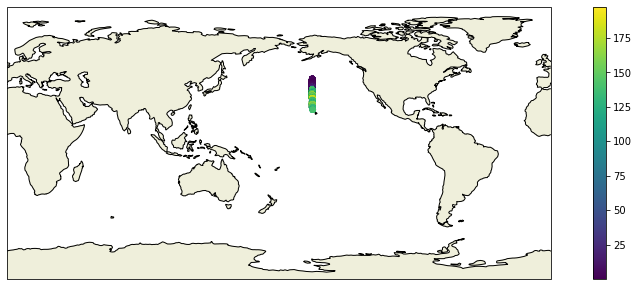

In [387]:
##Example plot of prochlorococcus biomass distribution for seaflow
#fig = px.scatter_geo(seaflow, lat='lat',lon='lon',color='abundance_prochloro')
#fig.show()

ind=(seaflow['cruise']=='MGL1704')

plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)); #this specifies which projection to use
ax.set_global();
ax.add_feature(cfeature.COASTLINE);
ax.add_feature(cfeature.LAND);
#ax.add_feature(cfeature.BORDERS);
im=ax.scatter(seaflow[ind]['lon'],seaflow[ind]['lat'],30,c=seaflow[ind]['abundance_prochloro'],transform=ccrs.PlateCarree());
plt.colorbar(im);

In [388]:
seaflow['lat_bins']=(seaflow['lat']).astype(int) # 1degree latitude bins

In [389]:
seaflow_latbins=seaflow[ind].groupby(['lat_bins']).mean()
seaflow_latbins

,lat,lon,depth,abundance_prochloro,abundance_synecho,abundance_picoeuk,abundance_croco,diam_prochloro,diam_synecho,diam_picoeuk,diam_croco,Qc_prochloro,Qc_synecho,Qc_picoeuk,Qc_croco,biomass_prochloro,biomass_synecho,biomass_picoeuk,biomass_croco
lat_bins,,,,,,,,,,,,,,,,,,,
21,21.992100,-157.630300,5.0,139.329159,0.977480,1.679368,NaN,0.404166,0.834533,1.901033,NaN,0.014452,0.093874,0.785360,NaN,2.013638,0.091577,1.320963,NaN
22,22.579055,-157.661046,5.0,130.366927,0.975280,1.740252,NaN,0.395930,0.816286,1.842584,NaN,0.013705,0.088759,0.734749,NaN,1.786378,0.086447,1.279715,NaN
23,23.563671,-157.847349,5.0,139.873073,1.014221,1.888831,NaN,0.435851,0.842593,2.231052,NaN,0.017658,0.096463,1.226126,NaN,2.474646,0.097522,2.254091,NaN
24,24.450779,-157.902205,5.0,145.854983,0.984015,1.918020,NaN,0.456695,0.841426,2.197082,NaN,0.019911,0.096094,1.228352,NaN,2.921962,0.094471,2.158801,NaN
25,25.591678,-157.928312,5.0,138.425496,1.163456,2.185374,NaN,0.431889,0.843764,1.862236,NaN,0.017221,0.096680,0.769735,NaN,2.398250,0.112673,1.639460,NaN
26,26.499623,-157.919281,5.0,143.262773,1.267372,2.225155,NaN,0.424794,0.846006,1.925276,NaN,0.016694,0.097499,0.844660,NaN,2.429565,0.122709,1.815130,NaN
27,27.450162,-157.939947,5.0,145.591410,1.143327,2.059323,NaN,0.448028,0.870528,2.229213,NaN,0.019016,0.104788,1.207119,NaN,2.792878,0.119967,2.469085,NaN
28,28.503941,-157.950465,5.0,169.136082,2.099264,1.994545,NaN,0.482192,0.886146,2.471486,NaN,0.022860,0.109661,1.564621,NaN,3.874166,0.231651,3.057260,NaN
29,29.522766,-157.999496,5.0,156.486177,3.037483,3.428412,NaN,0.439624,0.851982,1.894120,NaN,0.018047,0.099248,0.801268,NaN,2.836659,0.299175,2.667115,NaN


### In-class exercise \#2: how do  prochloro, synecho, picoeuk abundances and biomasses vary with latitude?

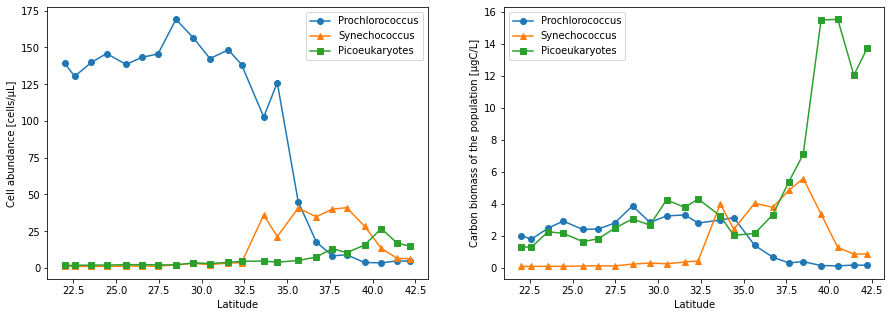

In [400]:
#solution

fig, axs=plt.subplots(1,2,figsize=(15,5))

axs[0].plot(seaflow_latbins['lat'],seaflow_latbins['abundance_prochloro'], 'o-',label='Prochlorococcus')
axs[0].plot(seaflow_latbins['lat'],seaflow_latbins['abundance_synecho'], '^-',label='Synechococcus')
axs[0].plot(seaflow_latbins['lat'],seaflow_latbins['abundance_picoeuk'], 's-',label='Picoeukaryotes')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Cell abundance [cells/µL]')
axs[0].legend()

axs[1].plot(seaflow_latbins['lat'],seaflow_latbins['biomass_prochloro'], 'o-',label='Prochlorococcus')
axs[1].plot(seaflow_latbins['lat'],seaflow_latbins['biomass_synecho'], '^-',label='Synechococcus')
axs[1].plot(seaflow_latbins['lat'],seaflow_latbins['biomass_picoeuk'], 's-',label='Picoeukaryotes')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Carbon biomass of the population [µgC/L]')
axs[1].legend();


### Continuously sampling instruments: Imaging FlowCytoBot (IFCB)


The Imaging FlowCytoBot (IFCB) is an in situ automated imaging flow cytometer that generates images of particles suspended in seawater, in this case from the underway uncontaminated seawater system aboard the R/V Langseth (intake 5m). The IFCB uses a recycled sheath fluid (0.2 µm filtered seawater) to align and drive particles individually towards a light source (red laser, 4.5 mW) in order to detect and identify single or colonial cells using a combination of optical properties (red fluorescence and light scattering intensities) and high resolution images (3.2 pixels per micron) by a mounted camera. Both optical properties are used to trigger targeted image acquisition of suspended particles in the size range <4 to 100 µm. The instrument continuously samples (few seconds) from ~5 ml aliquots from the intake, and processes all particles contained in that volume for the next 20 mins. This dataset is for the abundance of imaged cells by genus: https://simonscmap.com/catalog/datasets/Gradients2_MGL1704_IFCB_Abundance

In [369]:
ifcb_g2 = api.get_dataset('tblMGL1704_Gradients2_IFCB_Abundance')
ifcb_g2['time'] = pd.DatetimeIndex(ifcb_g2['time'])



/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


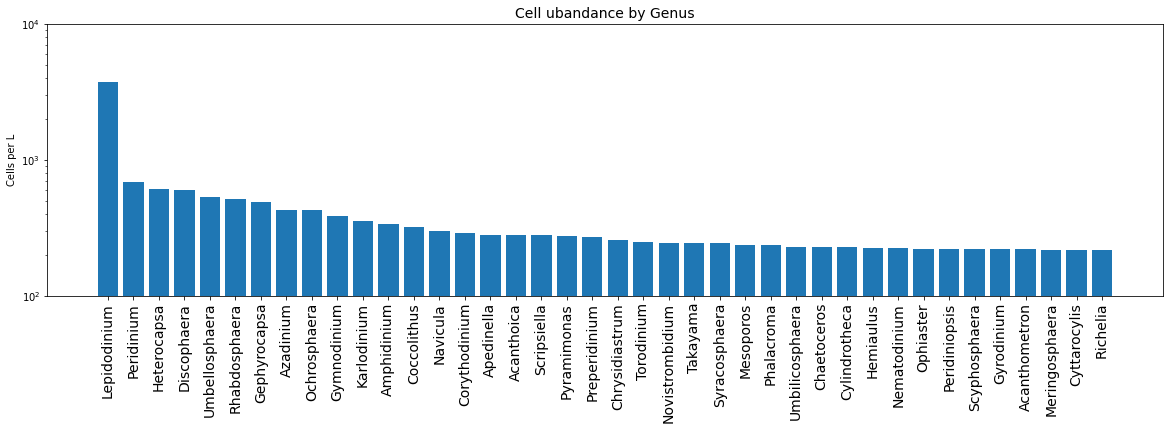

In [394]:
mean_cells=ifcb_g2[ifcb_g2['lat']<30].mean()[3:-3].dropna().sort_values(ascending=False)

plt.figure(figsize=(20,5))
plt.bar(mean_cells[:40].keys(),(mean_cells[:40]))
plt.xticks(rotation='vertical', fontsize=14)
plt.yscale('log')
plt.ylim((100,10000))
plt.ylabel('Cells per L')
plt.title('Cell ubandance by genus', fontsize=14);

#### Most abundant for lats<30 is __Lepidodinium__, which is a genus of __Dinoflagellates__ belonging to the family __Gymnodiniaceae__.

### In-class exercise #3: what are most abundant cells by genus for lats>40?

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


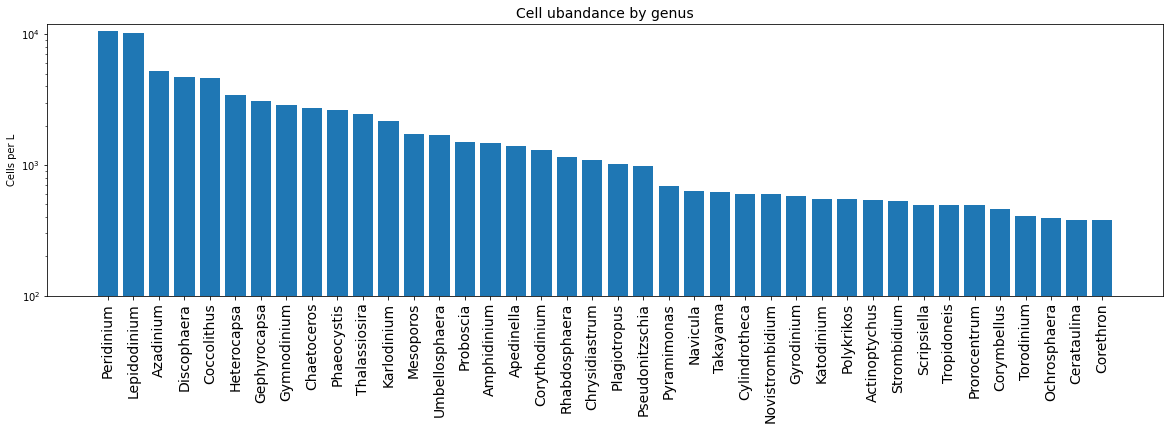

In [395]:
mean_cells=ifcb_g2[ifcb_g2['lat']>40].mean()[3:-3].dropna().sort_values(ascending=False)

plt.figure(figsize=(20,5))
plt.bar(mean_cells[:40].keys(),(mean_cells[:40]))
plt.xticks(rotation='vertical', fontsize=14)
plt.yscale('log')
plt.ylim((100,12000))
plt.ylabel('Cells per L')
plt.title('Cell ubandance by genus', fontsize=14);

#### Most abundant for lats>40 are __Peridinium__ and __Lepidodinium__. 

### Take-home exercise: explore diurnal cycle in cell abundances 